<a href="https://colab.research.google.com/github/rafaelcarmanhani/projeto-ru/blob/main/previsao/notebooks/Algoritmos_Area1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparando os dados (sem café da manhã)

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Importar os dados
#data = pd.read_csv('/content/dadosconcatenados_area1_v2 (1) (1).csv', header=(0))
data = pd.read_csv('/content/dadosconcatenados_area1_v2 (1).csv', header=(0))

#Remover o Café da Manhã
data = data[data['refeicao'] != 'cafe da manha'].copy()


Criando Colunas eh_vespera_nao_letivo e eh_depois_nao_letivo


In [ ]:
#Separa os dados por dia
daily_data = data[['Ano', 'Mês', 'Dia_mês', 'dia letivo']].drop_duplicates()
#Ordena os dias
daily_data = daily_data.sort_values(by=['Ano', 'Mês', 'Dia_mês']).reset_index(drop=True)

#Aplica o deslocamento pra véspera no dataFrame diário
dia_letivo_amanha = daily_data['dia letivo'].shift(-1)
daily_data['eh_vespera_nao_letivo'] = (dia_letivo_amanha == 0).astype(int)

#Aplica o deslocamento pra depois no dataFrame diário
dia_letivo_ontem = daily_data['dia letivo'].shift(1)
daily_data['eh_depois_nao_letivo'] = (dia_letivo_ontem == 0).astype(int)

#Junta as tabelas
data = pd.merge(
    data,
    daily_data[['Ano', 'Mês', 'Dia_mês',
                'eh_vespera_nao_letivo',
                'eh_depois_nao_letivo']],
    on=['Ano', 'Mês', 'Dia_mês'],
    how='left'
)

In [ ]:
#Remover colunas
data.drop(columns=['Ano','Aluno', 'Bolsista', 'Pos_Doc',
       'Aluno_Externo', 'Funcionario', 'Visitantes', 'Comunidade', 'sobremesa_2'], inplace=True)

#Remover Nan
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
# --- AGRUPAR CARDAPIO ---

def agrupar_nomes(data, xlsx, sheet_name, column_in_data):
  data_agrupamento = pd.read_excel(xlsx, sheet_name, header=(0))

  # Transpor para ficar mais fácil de tratar
  data_agrupamento_transposed = data_agrupamento.T

  #Itere pela coluna, pegue todos os valores dela
  grupos = []

  for name, col in data_agrupamento_transposed.items():
    #Remove os nans
    categoria_variacoes = list(filter(lambda x: not pd.isna(x), col.values))
    grupos.append(categoria_variacoes)


  # -----------------------
  # Substitui nomes

  # Criar dicionário
  substituicoes = {}

  #Aplicando a substituição
  for array_categoria in grupos:
    substituicoes[array_categoria[0]] = array_categoria


  for prato_padrao, variacoes in substituicoes.items():
      data[column_in_data] = data[column_in_data].replace(variacoes, prato_padrao)

  return data


In [ ]:
#--- AGRUPAR CARDAPIO ---

data['prato_principal_1'] = data['prato_principal_1'].str.strip()
data['prato_principal_2'] = data['prato_principal_2'].str.strip()
data['guarnição'] = data['guarnição'].str.strip()
data['sobremesa_1'] = data['sobremesa_1'].str.strip()


#Importar os dados

#xlsx = pd.ExcelFile('/content/agrupamento_de_nomes.xlsx')
xlsx = pd.ExcelFile('/content/agrupamento_de_nomes.xlsx')

data = agrupar_nomes(data, xlsx, 'Carnes', 'prato_principal_1')
data = agrupar_nomes(data, xlsx, 'Vegetariano', 'prato_principal_2')
data = agrupar_nomes(data, xlsx, 'Guarnição', 'guarnição')
data = agrupar_nomes(data, xlsx, 'Sobremesa doce', 'sobremesa_1')



In [ ]:
data['prato_principal_1'].value_counts()

#filé de coxa é a mesma coisa que frango assado

,count
prato_principal_1,
Bife,206
Lombo,115
Frango assado,108
Frango empanado,91
Pernil,70
Carne em cubos,66
Filé de frango,62
Carne moída,60
Linguiça,60


In [ ]:
data['prato_principal_2'].value_counts()

,count
prato_principal_2,
PVT,154
Omelete,104
Ovo frito,90
Curry de legumes,66
Quibe de brócolis,65
Almôndega de aveia,61
Tomate recheado,53
Suflê de legumes,50
Moussaka,48


In [ ]:
data['sobremesa_1'].value_counts()

,count
sobremesa_1,
Gelatina,93
Bolinho,89
Barra de cereais,87
Goiabada,78
Chocolate,69
Bombom,60
Picolé,59
Iogurte,56
Brigadeirão,49


In [ ]:
data['guarnição'].value_counts()

,count
guarnição,
Farofa,111
Polenta,96
Macarrão,96
Legumes,91
Batata,85
Batata palha,77
Chuchu,69
Creme de milho,58
Ervilha parmentier,55


Tabela já com as novas colunas e dados prontos

In [ ]:
data.head(30)

,Mês,Dia_semana,Dia_mês,refeicao,prato_principal_1,prato_principal_2,guarnição,sobremesa_1,Total,Precipitacao_mm,Temp_max_C,Temp_min_C,Umid_rel_ar,Vento_velocidade_horaria (m/s),Vento_rajada_maxima (m/s),dia letivo,eh_vespera_nao_letivo,eh_depois_nao_letivo
0,1,ter,3,almoco,Frango empanado,Quibe de brócolis,Creme de milho,Doce de leite,207.0,0.000000,25.233333,23.266667,72.000000,2.066667,7.166667,0,1,0
1,1,ter,3,jantar,Linguiça,Ovo frito,Farofa,Goiabada,183.0,0.000000,23.100000,22.133333,84.333333,1.166667,3.633333,0,1,0
2,1,qua,4,almoco,Bisteca,Hamburguer de lentilha,Couve,Barra de cereais,247.0,0.000000,22.300000,21.066667,84.666667,3.366667,8.366667,0,1,1
3,1,qua,4,jantar,Lagarto,Goulash,Polenta,Gelatina,181.0,3.800000,21.666667,19.866667,93.666667,2.166667,9.066667,0,1,1
4,1,qui,5,almoco,Peixe frito,Omelete,Purês,Chocolate,281.0,1.600000,19.566667,18.966667,94.333333,0.166667,2.900000,0,1,1
5,1,qui,5,jantar,Isca de carne,Curry de legumes,Legumes,Mousse de limão,248.0,0.000000,18.766667,18.033333,90.000000,3.666667,10.133333,0,1,1
6,1,sex,6,almoco,Bife,Cassoulet,Batata,Picolé,307.0,0.000000,22.133333,20.200000,75.333333,2.433333,7.066667,0,1,1
7,1,sex,6,jantar,Frango assado,PVT,Macarrão,Brigadeirão,256.0,0.000000,18.800000,17.566667,82.333333,3.733333,10.833333,0,1,1
8,1,sáb,7,almoco,Carne de panela,Brócolis gratinado,Cenoura,Sagu,215.0,0.000000,22.566667,21.600000,68.333333,2.300000,5.666667,0,1,1
9,1,seg,9,almoco,Bife,Tomate recheado,Torta de legumes,Bombom,421.0,1.866667,22.433333,20.166667,84.333333,1.500000,5.133333,0,1,1


In [ ]:
#Database que combina dia da semana com refeição para a inclusao do fator temporal

data_combinada = data.copy()
#Aplicando One Hot Encoding
data_combinada = pd.get_dummies(data_combinada, columns=['Mês','Dia_mês','prato_principal_1', 'prato_principal_2', 'guarnição', 'sobremesa_1'])

data_combinada['diasemana_refeicao'] = data_combinada['Dia_semana'] + '_' + data_combinada['refeicao']
data_combinada.drop(columns=['Dia_semana', 'refeicao'], inplace=True)
data_combinada = pd.get_dummies(data_combinada, columns=['diasemana_refeicao'])
data_combinada.head(10)

data_combinada.head(5)


,Total,Precipitacao_mm,Temp_max_C,Temp_min_C,Umid_rel_ar,Vento_velocidade_horaria (m/s),Vento_rajada_maxima (m/s),dia letivo,eh_vespera_nao_letivo,eh_depois_nao_letivo,Mês_1,Mês_2,Mês_3,Mês_4,Mês_5,Mês_6,Mês_7,Mês_8,Mês_9,Mês_10,Mês_11,Mês_12,Dia_mês_1,Dia_mês_2,Dia_mês_3,Dia_mês_4,Dia_mês_5,Dia_mês_6,Dia_mês_7,Dia_mês_8,Dia_mês_9,Dia_mês_10,Dia_mês_11,Dia_mês_12,Dia_mês_13,Dia_mês_14,Dia_mês_15,Dia_mês_16,Dia_mês_17,Dia_mês_18,Dia_mês_19,Dia_mês_20,Dia_mês_21,Dia_mês_22,Dia_mês_23,Dia_mês_24,Dia_mês_25,Dia_mês_26,Dia_mês_27,Dia_mês_28,Dia_mês_29,Dia_mês_30,Dia_mês_31,prato_principal_1_Bife,prato_principal_1_Bisteca,prato_principal_1_Carne de panela,prato_principal_1_Carne em cubos,prato_principal_1_Carne louca,prato_principal_1_Carne moída,prato_principal_1_Cubos de pernil,prato_principal_1_Estrogonofe de carne,prato_principal_1_Estrogonofe de frango,prato_principal_1_Feijoada,prato_principal_1_Filé de coxa,prato_principal_1_Filé de frango,prato_principal_1_Filé de peixe,prato_principal_1_Frango assado,prato_principal_1_Frango cremoso,prato_principal_1_Frango empanado,prato_principal_1_Frango xadrez,prato_principal_1_Fricassê de frango,prato_principal_1_Hamburguer,prato_principal_1_Isca de carne,prato_principal_1_Isca de frango,prato_principal_1_Lagarto,prato_principal_1_Lasanha bolonhesa,prato_principal_1_Linguiça,prato_principal_1_Lombo,prato_principal_1_Panqueca de carne,prato_principal_1_Peixe frito,prato_principal_1_Pernil,prato_principal_1_Quibe,prato_principal_2_Almôndega de PVT,prato_principal_2_Almôndega de aveia,prato_principal_2_Almôndega de feijão,prato_principal_2_Almôndega de grão de bico,prato_principal_2_Almôndega de lentilha,prato_principal_2_Almôndega de ricota,prato_principal_2_Assado vienense,prato_principal_2_Baião de dois,prato_principal_2_Batata especial,prato_principal_2_Batatalhoada,prato_principal_2_Bife de PVT,prato_principal_2_Bife de feijão,prato_principal_2_Bife de grão de bico,prato_principal_2_Bife de lentilha,prato_principal_2_Bobó de abóbora,prato_principal_2_Bobó de palmito,prato_principal_2_Brócolis gratinado,prato_principal_2_Caneloni de brócolis,prato_principal_2_Caneloni de ricota,prato_principal_2_Cassoulet,prato_principal_2_Curry de legumes,prato_principal_2_Escondidinho de PVT,prato_principal_2_Estrogonofe de PVT,prato_principal_2_Estrogonofe de grão de bico,prato_principal_2_Estrogonofe de legumes,prato_principal_2_Feijoada vegetariana,prato_principal_2_Fricassê de PVT,prato_principal_2_Goulash,prato_principal_2_Grão de bico,prato_principal_2_Grãos com queijo,prato_principal_2_Grãos gratinados,prato_principal_2_Hamburguer de PVT,prato_principal_2_Hamburguer de feijão branco,prato_principal_2_Hamburguer de grão de bico,prato_principal_2_Hamburguer de lentilha,prato_principal_2_Lasanha de PVT,prato_principal_2_Lasanha de abobrinha,prato_principal_2_Lasanha de berinjela,prato_principal_2_Lasanha de queijo,prato_principal_2_Lasanha de queijo com espinhafre,prato_principal_2_Moussaka,prato_principal_2_Omelete,prato_principal_2_Ovo cozido,prato_principal_2_Ovo frito,prato_principal_2_PVT,prato_principal_2_Panqueca de PVT,prato_principal_2_Quibe de PVT,prato_principal_2_Quibe de abóbora,prato_principal_2_Quibe de brócolis,prato_principal_2_Quibe de espinafre,prato_principal_2_Rondele,prato_principal_2_Suflê de legumes,prato_principal_2_Tomate recheado,prato_principal_2_Xadrez de PVT,prato_principal_2_Xadrez de grão de bico,prato_principal_2_acelga à chinesa,guarnição_,guarnição_Abobrinha,guarnição_Abóbora,guarnição_Acelga,guarnição_Batata,guarnição_Batata doce,guarnição_Batata palha,guarnição_Brócolis,guarnição_Cenoura,guarnição_Chuchu,guarnição_Couve,guarnição_Couve-flor,guarnição_Creme de milho,guarnição_Cuscuz,guarnição_Ervilha parmentier,guarnição_Farofa,guarnição_Legumes,guarnição_Macarrão,guarnição_Mandioca,guarnição_Nhoque,guarnição_Polenta,guarnição_Purês,guarnição_Quiabo,guarnição_Repolho,guarnição_Repolho com cenoura,guarnição_Torta de legumes,guarnição_Vagem,guarnição_Virado,guar

In [ ]:
#Aplicando One Hot Encoding nas variáveis categóricas
data = pd.get_dummies(data, columns=['Mês','Dia_semana','Dia_mês','prato_principal_1', 'prato_principal_2', 'guarnição', 'sobremesa_1', 'refeicao'])

#Guardando os atributos
atributos = data.drop(columns=['Total']).columns

Descobrindo o Peso dos Itens do Cardápio

In [ ]:
!pip install doubleml


In [ ]:
#fator temporal (dia da semana e qual refeição)

from doubleml import DoubleMLData
from sklearn.ensemble import RandomForestRegressor
from doubleml.plm import DoubleMLPLR

#Define Y (objetivo)
y_col = 'Total'

#Define D (Variável que queremos saber o impacto)

treatment_prefix = "diasemana_refeicao"

d_cols = [c for c in data_combinada.columns
          if c.startswith(treatment_prefix)]


#Define X (Variáveis de confusão)
x_cols = [c for c in data_combinada.columns if c not in d_cols + [y_col]]

#Criar o objeto do doubleml
dml_data = DoubleMLData(
    data_combinada,
    y_col=y_col,
    d_cols=d_cols,
    x_cols=x_cols
)

#Escolher os modelos ML
#ml_y = RandomForestRegressor(n_estimators=50, random_state=0)
ml_m = RandomForestRegressor(n_estimators=100, random_state=0) #antes aqui era classifier
ml_l = RandomForestRegressor(n_estimators=100, random_state=0)

#Rodar
dml_plr = DoubleMLPLR(
    dml_data,
    #ml_g=ml_y,    # modelo para Total ~ X
    ml_m=ml_m,    # modelo para D ~ X
    ml_l=ml_l,    # modelo para Total ~ X
    n_folds=3
)
dml_plr.fit()

#Resultados
print(dml_plr.summary)


                                     coef    std err          t         P>|t|  \
diasemana_refeicao_qua_almoco  109.443416  23.249809   4.707282  2.510411e-06   
diasemana_refeicao_qua_jantar -130.535141  24.619529  -5.302097  1.144798e-07   
diasemana_refeicao_qui_almoco   92.277914  22.829277   4.042087  5.297765e-05   
diasemana_refeicao_qui_jantar -207.628228  23.837137  -8.710284  3.031149e-18   
diasemana_refeicao_seg_almoco   26.252314  26.457285   0.992253  3.210742e-01   
diasemana_refeicao_seg_jantar  -63.691481  23.587314  -2.700243  6.928884e-03   
diasemana_refeicao_sex_almoco   -8.237525  22.096875  -0.372791  7.093037e-01   
diasemana_refeicao_sex_jantar -359.986493  24.505557 -14.689994  7.472017e-49   
diasemana_refeicao_sáb_almoco -377.886166  31.952139 -11.826631  2.843256e-32   
diasemana_refeicao_ter_almoco  115.959138  21.966247   5.278969  1.299128e-07   
diasemana_refeicao_ter_jantar  -16.240153  21.604181  -0.751713  4.522234e-01   

                           

In [ ]:
for nome, valor in zip(d_cols, dml_plr.coef):
    print(nome, "→", valor)

diasemana_refeicao_qua_almoco → 109.4434155998952
diasemana_refeicao_qua_jantar → -130.53514076135485
diasemana_refeicao_qui_almoco → 92.27791362161412
diasemana_refeicao_qui_jantar → -207.6282275293261
diasemana_refeicao_seg_almoco → 26.252314433326788
diasemana_refeicao_seg_jantar → -63.691480864592656
diasemana_refeicao_sex_almoco → -8.237525113616949
diasemana_refeicao_sex_jantar → -359.986493183112
diasemana_refeicao_sáb_almoco → -377.8861658361599
diasemana_refeicao_ter_almoco → 115.95913808844257
diasemana_refeicao_ter_jantar → -16.24015338951655


In [ ]:
from doubleml import DoubleMLData
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from doubleml.plm import DoubleMLPLR

#Define Y (objetivo)
y_col = 'Total'

#Define D (Variável que queremos saber o impacto)
treatment_prefixes = [
    'prato_principal_1_',
    'prato_principal_2_',
    'guarnição_',
    'sobremesa_1_'
]

d_cols = [c for c in data.columns
          if any(c.startswith(p) for p in treatment_prefixes)]

#Define X (Variáveis de confusão)
x_cols = [c for c in data.columns if c not in d_cols + [y_col]]

#Criar o objeto do doubleml
dml_data = DoubleMLData(
    data,
    y_col=y_col,
    d_cols=d_cols,
    x_cols=x_cols
)

#Escolher os modelos ML
#ml_y = RandomForestRegressor(n_estimators=50, random_state=0)
ml_m = RandomForestClassifier(n_estimators=50, random_state=0) #antes aqui era classifier
ml_l = RandomForestRegressor(n_estimators=50, random_state=0)

#Rodar
dml_plr = DoubleMLPLR(
    dml_data,
    #ml_g=ml_y,    # modelo para Total ~ X
    ml_m=ml_m,    # modelo para D ~ X
    ml_l=ml_l,    # modelo para Total ~ X
    n_folds=3
)
dml_plr.fit()

#Resultados
print(dml_plr.summary)


/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

                                                          coef     std err  \
prato_principal_1_Bife                              -83.088213   18.831264   
prato_principal_1_Bisteca                           -97.977886   45.669774   
prato_principal_1_Carne de panela                   -42.333953   47.006295   
prato_principal_1_Carne em cubos                    -28.053885   26.564574   
prato_principal_1_Carne louca                        63.986657   34.431554   
prato_principal_1_Carne moída                       -16.181835   28.550383   
prato_principal_1_Cubos de pernil                    -2.406219   45.958258   
prato_principal_1_Estrogonofe de carne              134.690202   46.206557   
prato_principal_1_Estrogonofe de frango             178.438446   76.332238   
prato_principal_1_Feijoada                          256.359693  158.668127   
prato_principal_1_Filé de coxa                      100.531870   47.348076   
prato_principal_1_Filé de frango                     -1.597877  

/usr/local/lib/python3.12/dist-packages/doubleml/utils/_checks.py:194: UserWarning: Propensity predictions from learner RandomForestClassifier(n_estimators=50, random_state=0) for ml_m are close to zero or one (eps=1e-12).
  warnings.warn(


In [ ]:
for nome, valor in zip(d_cols, dml_plr.coef):
    print(nome, "→", valor)

prato_principal_1_Bife → -83.08821277429233
prato_principal_1_Bisteca → -97.97788636221266
prato_principal_1_Carne de panela → -42.333952895568345
prato_principal_1_Carne em cubos → -28.053885226135804
prato_principal_1_Carne louca → 63.98665699782451
prato_principal_1_Carne moída → -16.181834536418627
prato_principal_1_Cubos de pernil → -2.4062188719881656
prato_principal_1_Estrogonofe de carne → 134.69020213176492
prato_principal_1_Estrogonofe de frango → 178.43844636457086
prato_principal_1_Feijoada → 256.3596933187294
prato_principal_1_Filé de coxa → 100.53186966242713
prato_principal_1_Filé de frango → -1.5978770201778587
prato_principal_1_Filé de peixe → -461.9818630941785
prato_principal_1_Frango assado → 42.52303993138374
prato_principal_1_Frango cremoso → -26.14056050401921
prato_principal_1_Frango empanado → 132.23333670169768
prato_principal_1_Frango xadrez → -55.93684210526316
prato_principal_1_Fricassê de frango → -15.027145631999183
prato_principal_1_Hamburguer → 125.5163

In [ ]:
#---SEPARANDO TREINO E TESTE---

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel]
X = data.drop(columns=[ylabel])

#Guardar originais
y_original = y
X_original = X

# transforma em numpy
y = y.to_numpy()
X = X.to_numpy()

# divide o conjunto em treinamento e teste
p = 0.2 # fracao de elementos no conjnto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p,random_state=42)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#O Pearson mede a relação linear entre duas variáveis
#O Spearman mede a relação monotônica, avaliando se uma variável
#tende a aumentar ou diminuir conforme a outra, sem exigir linearidade.

#Filtrar apenas colunas de alimentos
alimentos_cols = [col for col in X_original.columns if
                  any(x in col for x in ["prato","guarn","salada","sobremesa"])]
X_alimentos = X_original[alimentos_cols]
y = data['Total']
df_corr = X_alimentos.copy()
df_corr['Total'] = y

#Calcular correlação Pearson e Spearman
pearson_corr = df_corr.corr(method='pearson')['Total'].drop('Total')
spearman_corr = df_corr.corr(method='spearman')['Total'].drop('Total')

#Juntar em um único DataFrame
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

#Ordenar pelo Pearson
corr_df_sorted = corr_df.sort_values(by='Pearson', ascending=False)
print("Correlação de cada alimento com Total (Pearson e Spearman):\n")
print(corr_df_sorted)

Correlação de cada alimento com Total (Pearson e Spearman):

                                                     Pearson  Spearman
prato_principal_1_Frango empanado                   0.109579  0.132237
sobremesa_1_Doce de banana                          0.092654  0.104986
sobremesa_1_Pudim de pão                            0.089858  0.086976
guarnição_Batata palha                              0.081244  0.092660
prato_principal_2_Lasanha de PVT                    0.075485  0.082223
prato_principal_1_Estrogonofe de carne              0.074256  0.086291
sobremesa_1_Pé de moça                              0.070844  0.065356
prato_principal_2_Baião de dois                     0.069055  0.064501
prato_principal_2_Lasanha de queijo com espinhafre  0.067903  0.073227
sobremesa_1_Kit junino                              0.060871  0.061021
sobremesa_1_Bolinho                                 0.059233  0.039717
guarnição_Repolho                                   0.055608  0.053259
prato_principal_

Algoritmos (usando validação cruzada externa)

Fold 1: R² = 0.9037, RMSE = 263.24


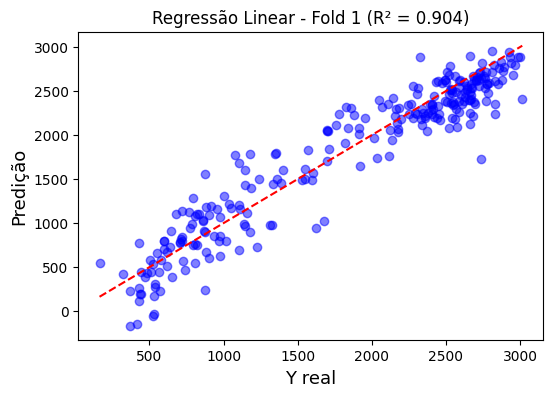

Fold 2: R² = 0.8884, RMSE = 271.61


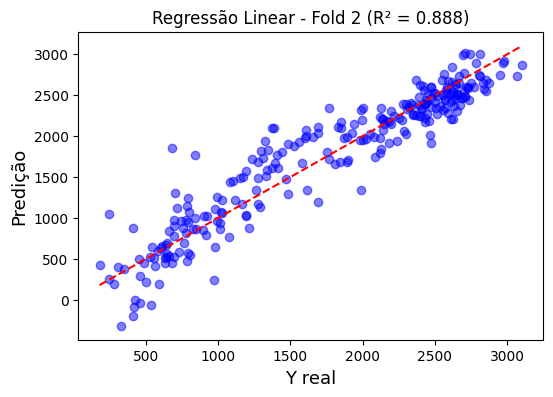

Fold 3: R² = 0.8985, RMSE = 268.03


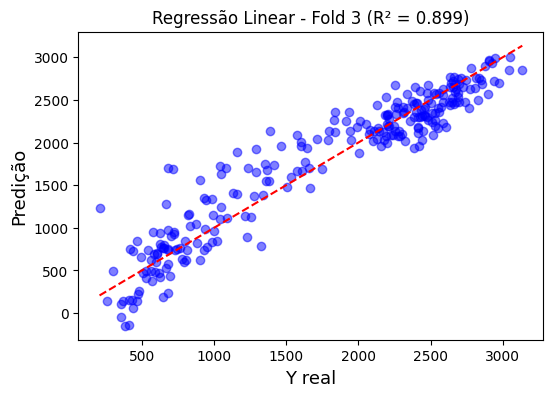

Fold 4: R² = 0.8614, RMSE = 311.57


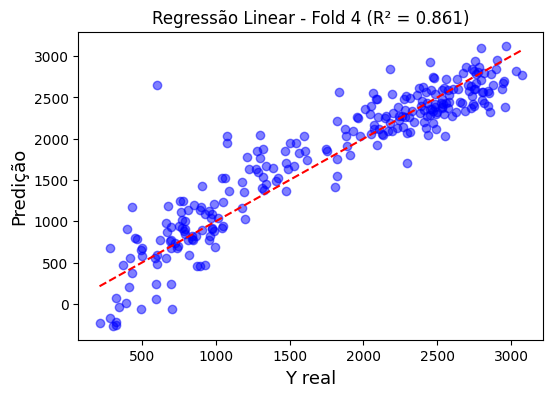

Fold 5: R² = 0.9058, RMSE = 249.75


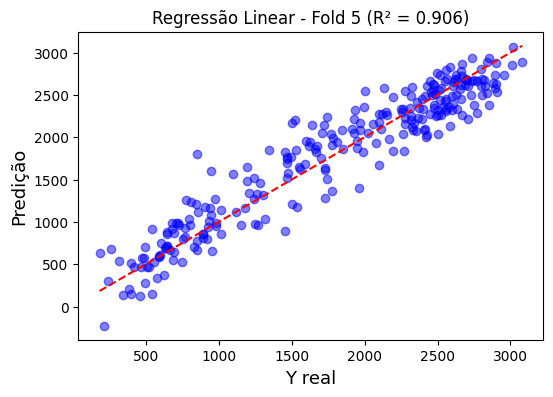


--- Resultados Finais (Regressão Linear) ---
R² médio: 0.8916 (DP: 0.0163)
RMSE médio: 272.84 (DP: 20.73)


In [ ]:
#----REGRESSÃO LINEAR MÚLTIPLA----

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []
fold = 1

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    #Métricas
    R2 = r2_score(y_test, y_pred)
    #R2_ajustado = 1-(1-R2)*(X_test.size-1)/(X_test.size-p-1)
    lista_r2.append(R2)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R² = {R2:.4f}, RMSE = {RMSE:.2f}")

    # ---- Plot ----
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.xlabel("Y real", fontsize=13)
    plt.ylabel("Predição", fontsize=13)
    plt.title(f"Regressão Linear - Fold {fold} (R² = {R2:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')

    plt.show()

    fold += 1

r2_reg_lin_mult = np.mean(lista_r2)
r2_dp_reg_lin_mult = np.std(lista_r2)
rmse_reg_lin_mult = np.mean(lista_rmse)
rmse_dp_reg_lin_mult = np.std(lista_rmse)

print(f"\n--- Resultados Finais (Regressão Linear) ---")
print(f"R² médio: {r2_reg_lin_mult:.4f} (DP: {r2_dp_reg_lin_mult:.4f})")
print(f"RMSE médio: {rmse_reg_lin_mult:.2f} (DP: {rmse_dp_reg_lin_mult:.2f})")

Fold 1: hiperparâmetro alpha escolhido = 2.48136, R2 = 0.9153


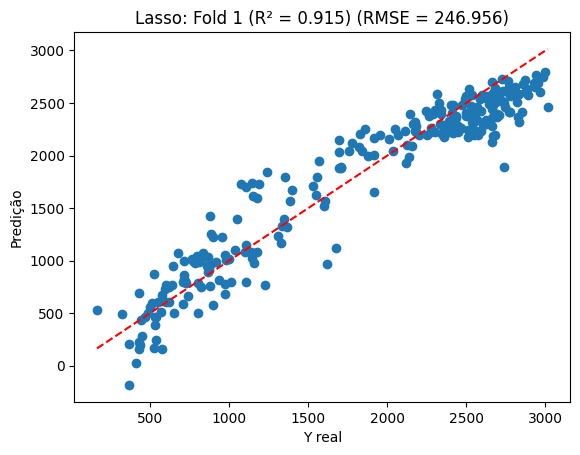

Fold 2: hiperparâmetro alpha escolhido = 1.82985, R2 = 0.9104


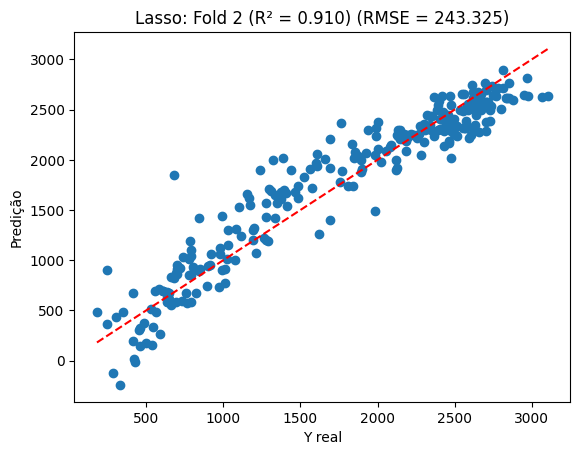

Fold 3: hiperparâmetro alpha escolhido = 2.03209, R2 = 0.9075


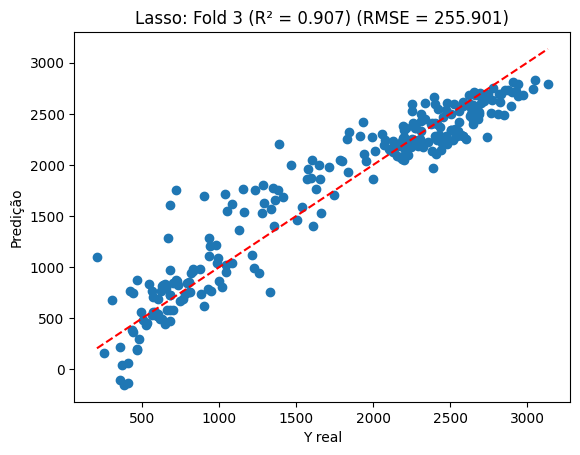

Fold 4: hiperparâmetro alpha escolhido = 2.34078, R2 = 0.8688


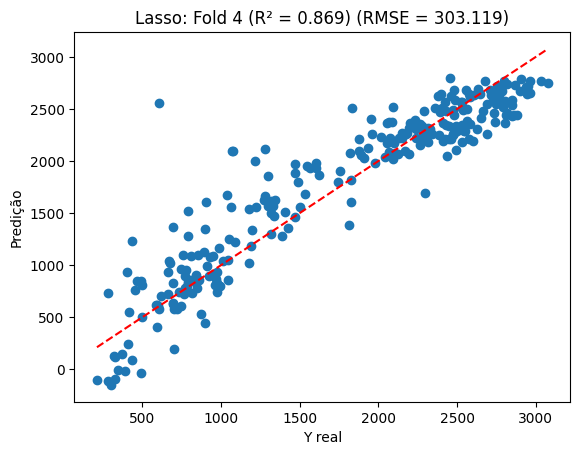

Fold 5: hiperparâmetro alpha escolhido = 2.85702, R2 = 0.9102


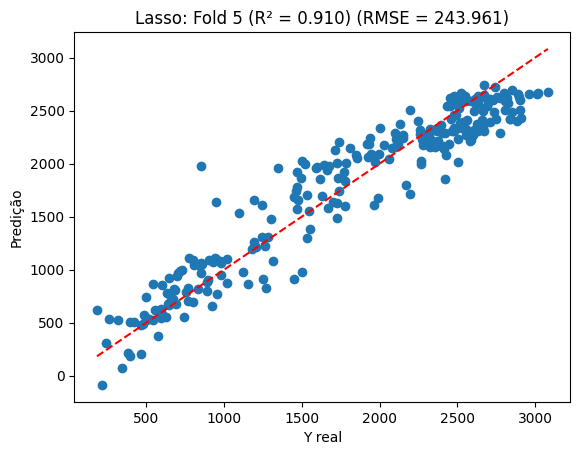


R2 médio no K-Fold: 0.9024229463509986
Desvio padrão do R2: 0.017007188334208136


In [ ]:
#---LASSO---

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# valor a ser predito
ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True,random_state=42)

lista_r2 = [] # para armezar o R2 de cada fold
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste do fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # LassoCV calcula o melhor alpha usando k-fold interno nos dados de treino do k-fold externo
    lasso = LassoCV(cv=5, max_iter=100000,random_state=42)
    lasso.fit(X_train, y_train)

    # previsão no teste
    y_pred = lasso.predict(X_test)

    # Métricas
    R2 = r2_score(y_test, y_pred)
    lista_r2.append(R2)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: hiperparâmetro alpha escolhido = {lasso.alpha_:.5f}, R2 = {R2:.4f}")

    # ---- Plot do fold ----
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Lasso: Fold {fold} (R² = {R2:.3f}) (RMSE = {RMSE:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.show()

    fold += 1

# Média dos R2 ao final
r2_lasso = np.mean(lista_r2)
r2_dp_lasso = np.std(lista_r2)
rmse_lasso = np.mean(lista_rmse)
rmse_dp_lasso = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_lasso)
print("Desvio padrão do R2:", r2_dp_lasso)
# print("RMSE médio no K-Fold:", rmse_lasso)
# print("Desvio padrão do RMSE:", rmse_dp_lasso)


In [ ]:
#Verificando os atributos zerados pelo LASSO

# Cria uma lista de tuplas (atributo, coeficiente)
coef_atributos = list(zip(atributos, lasso.coef_))

# Ordena pelo valor absoluto do coeficiente, do maior para o menor
coef_atributos_ordenados = sorted(coef_atributos, key=lambda x: abs(x[1]), reverse=True)

# Imprime
for atributo, coef in coef_atributos_ordenados:
    print(f'{atributo}: {coef}')


Dia_semana_sáb: -895.1284847712441
dia letivo: 792.2083748882073
Mês_12: -539.3918236560404
eh_vespera_nao_letivo: -513.1648352864673
refeicao_almoco: 305.4781202449329
Dia_semana_sex: -289.44840794433856
Mês_1: -279.32022413828025
prato_principal_1_Filé de peixe: -260.0819079433745
Mês_7: -194.44989982153763
prato_principal_1_Peixe frito: -145.32004210619533
Mês_4: 142.89323972646184
Mês_3: 126.5259625851717
Mês_5: 116.00141351910679
Dia_semana_ter: 113.6675003988767
prato_principal_1_Lasanha bolonhesa: 72.31315177209487
guarnição_Batata palha: 68.82284790053507
eh_depois_nao_letivo: -57.51676344708966
prato_principal_1_Frango empanado: 57.27353110918105
Mês_11: -54.1841545208533
prato_principal_1_Frango assado: 47.52496586420067
Dia_semana_seg: 40.463654829669316
Mês_10: -40.13022090327912
prato_principal_2_PVT: -38.60151561377842
Dia_semana_qua: 35.56622321759259
prato_principal_2_Ovo cozido: -34.54930462765985
prato_principal_1_Bife: -34.42582356354819
guarnição_Farofa: -30.9696808

Fold 1: R2 = 0.9162, RMSE = 245.576


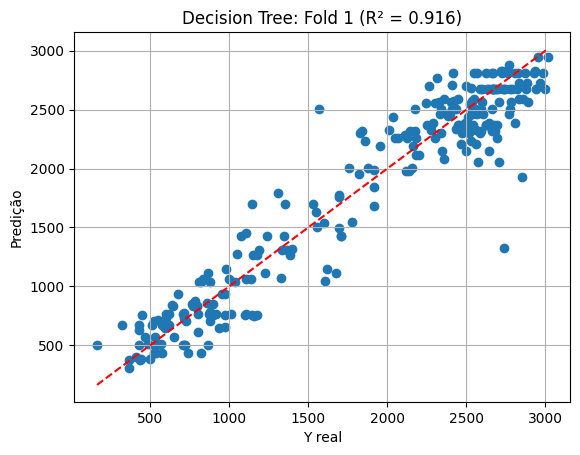

Fold 2: R2 = 0.9179, RMSE = 233.031


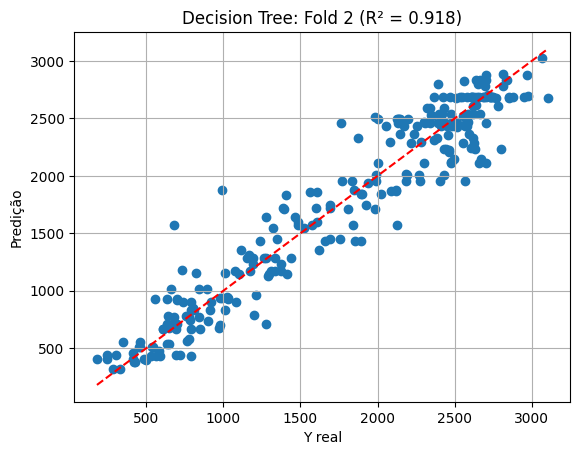

Fold 3: R2 = 0.8958, RMSE = 271.574


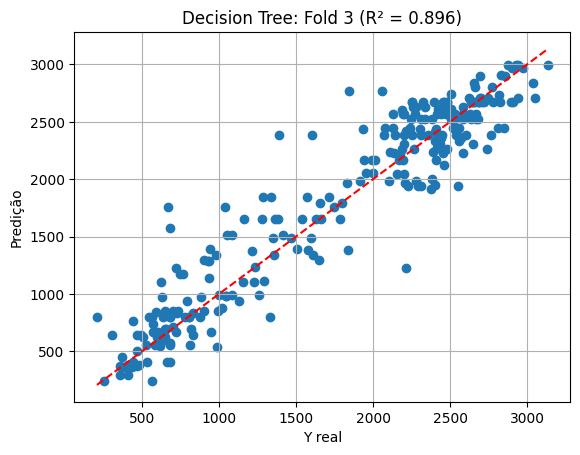

Fold 4: R2 = 0.8783, RMSE = 291.961


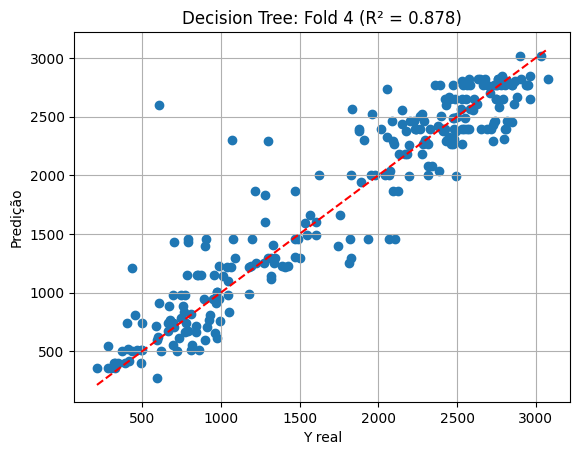

Fold 5: R2 = 0.8984, RMSE = 259.410


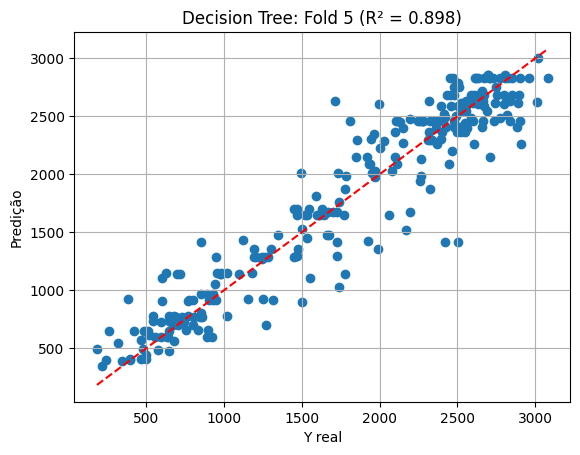


R2 médio no K-Fold: 0.9013085117686757
Desvio padrão do R2: 0.01459588917330058


In [ ]:
# --- Decision Tree Regressor ---

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #ajuste dos hiperparâmetros
    tree = DecisionTreeRegressor(
        max_depth=15,           # controla a profundidade da árvore
        min_samples_split=10,   # exige pelo menos 10 amostras para dividir um nó
        min_samples_leaf=4,     # cada folha precisa ter pelo menos 4 amostras
        random_state=42
    )
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Decision Tree: Fold {fold} (R² = {R2:.3f})")

    # linha y=x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.show()

    fold += 1

r2_decision_tree = np.mean(lista_r2)
r2_dp_decision_tree = np.std(lista_r2)
rmse_decision_tree = np.mean(lista_rmse)
rmse_dp_decision_tree = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_decision_tree)
print("Desvio padrão do R2:", r2_dp_decision_tree)


Fold 1: R2 = 0.9329, RMSE = 219.676


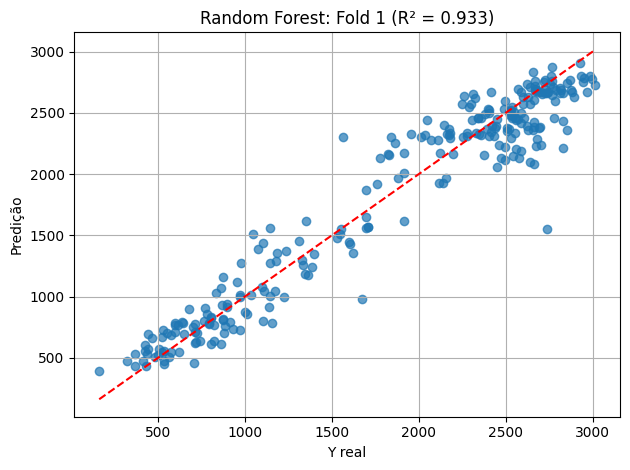

Fold 2: R2 = 0.9471, RMSE = 187.060


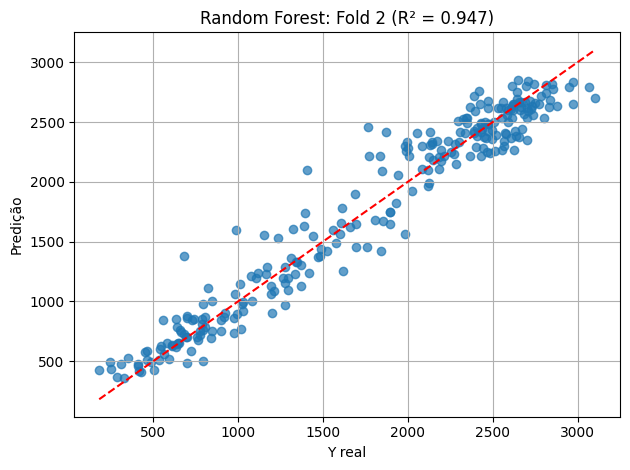

Fold 3: R2 = 0.9363, RMSE = 212.275


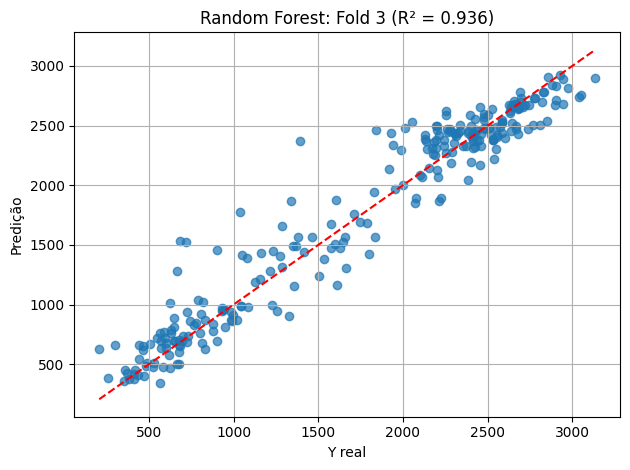

Fold 4: R2 = 0.8967, RMSE = 268.950


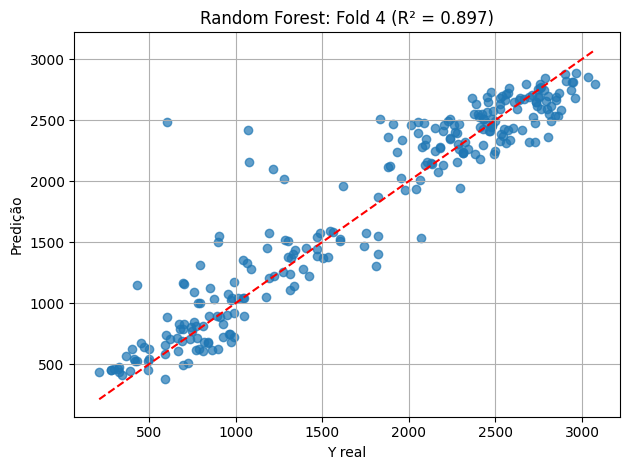

Fold 5: R2 = 0.9233, RMSE = 225.482


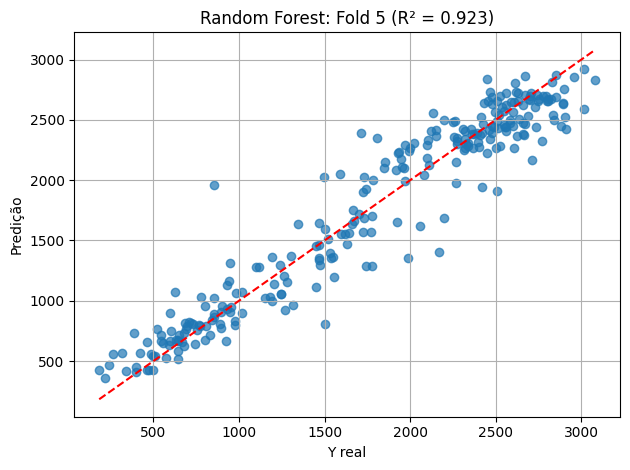


R2 médio no K-Fold: 0.9272605665311824
Desvio padrão do R2: 0.017071475591248882


In [ ]:
# --- Random Forest Regressor ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    # separa treino e teste do fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # modelo Random Forest
    rf = RandomForestRegressor(
        n_estimators=300,      # número de árvores
        max_depth=30,        # limitar a profundidade
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
    )

    rf.fit(X_train, y_train)

    # previsão
    y_pred = rf.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Random Forest: Fold {fold} (R² = {R2:.3f})")
    plt.grid(True)

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados finais

r2_random_forest = np.mean(lista_r2)
r2_dp_random_forest = np.std(lista_r2)
rmse_random_forest = np.mean(lista_rmse)
rmse_dp_random_forest = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_random_forest)
print("Desvio padrão do R2:", r2_dp_random_forest)



Fold 1: alpha = 54.62277, R2 = 0.9077, RMSE = 257.736


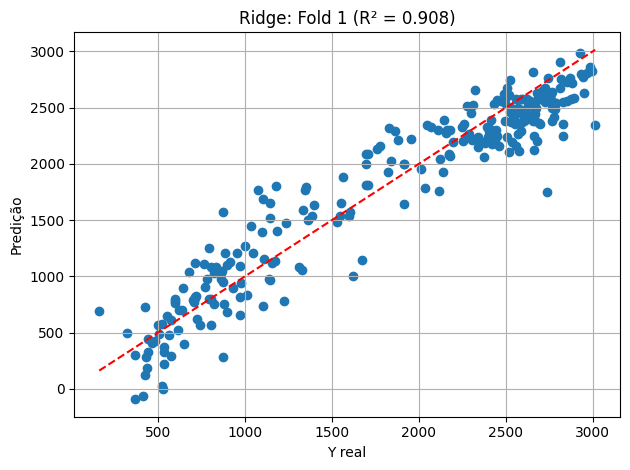

Fold 2: alpha = 45.34879, R2 = 0.8934, RMSE = 265.486


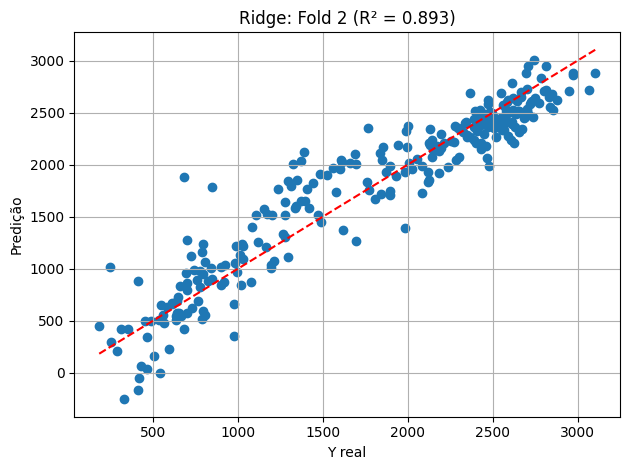

Fold 3: alpha = 45.34879, R2 = 0.8970, RMSE = 270.029


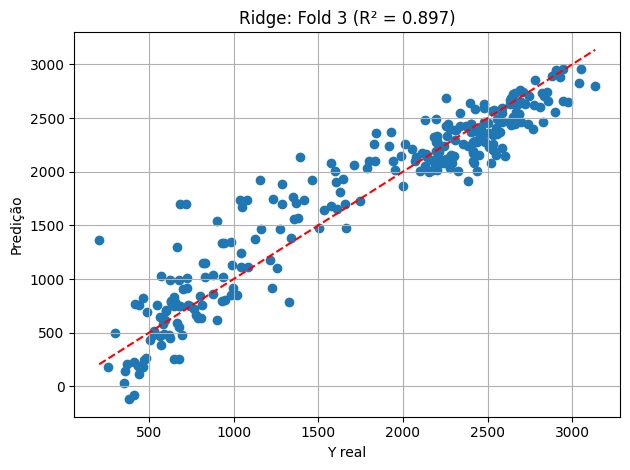

Fold 4: alpha = 54.62277, R2 = 0.8666, RMSE = 305.677


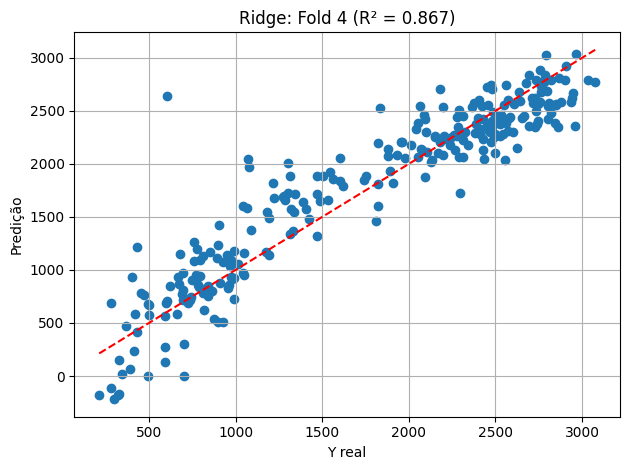

Fold 5: alpha = 65.79332, R2 = 0.9076, RMSE = 247.475


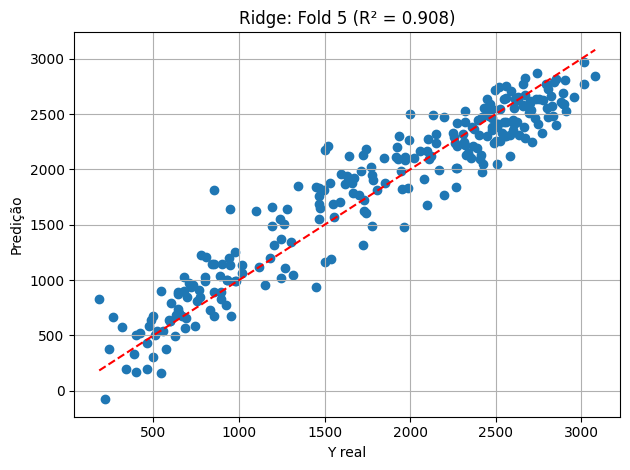


R2 médio no K-Fold: 0.8944338425720139
Desvio padrão do R2: 0.015052426252155464


In [ ]:
# --- RIDGE REGRESSION ---

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RidgeCV
    ridge = make_pipeline(
        StandardScaler(),
        RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)  # faz cv para escolher alpha
    )

    ridge.fit(X_train, y_train)

    # previsão
    y_pred = ridge.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    # alpha escolhido
    alpha_escolhido = ridge.named_steps['ridgecv'].alpha_

    print(f"Fold {fold}: alpha = {alpha_escolhido:.5f}, R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Ridge: Fold {fold} (R² = {R2:.3f})")

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados

r2_ridge = np.mean(lista_r2)
r2_dp_ridge = np.std(lista_r2)
rmse_ridge = np.mean(lista_rmse)
rmse_dp_ridge = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_ridge)
print("Desvio padrão do R2:", r2_dp_ridge)

Fold 1: alpha = 0.06952, l1_ratio = 0.01, R2 = 0.9078, RMSE = 257.629


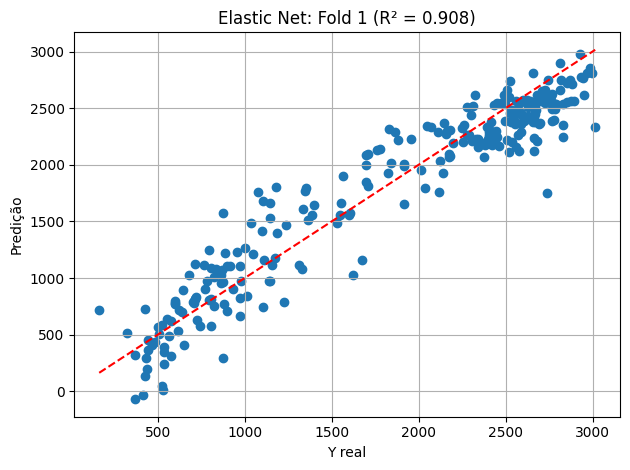

Fold 2: alpha = 0.06952, l1_ratio = 0.01, R2 = 0.8945, RMSE = 264.053


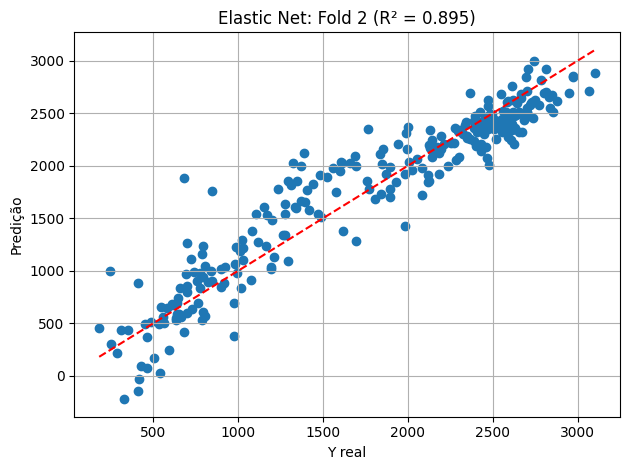

Fold 3: alpha = 0.06952, l1_ratio = 0.01, R2 = 0.8957, RMSE = 271.648


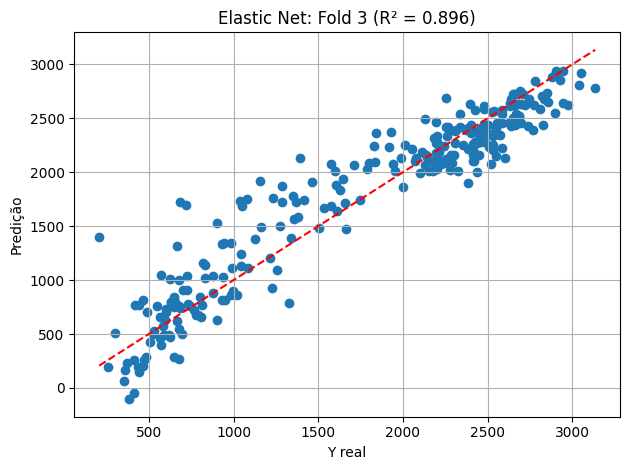

Fold 4: alpha = 0.06952, l1_ratio = 0.01, R2 = 0.8668, RMSE = 305.387


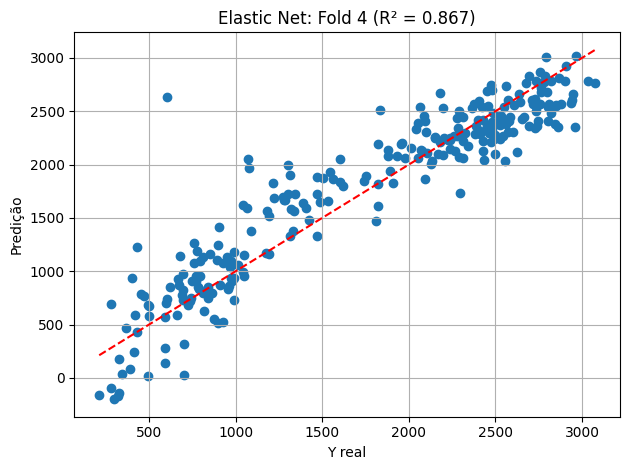

Fold 5: alpha = 0.06952, l1_ratio = 0.01, R2 = 0.9075, RMSE = 247.603


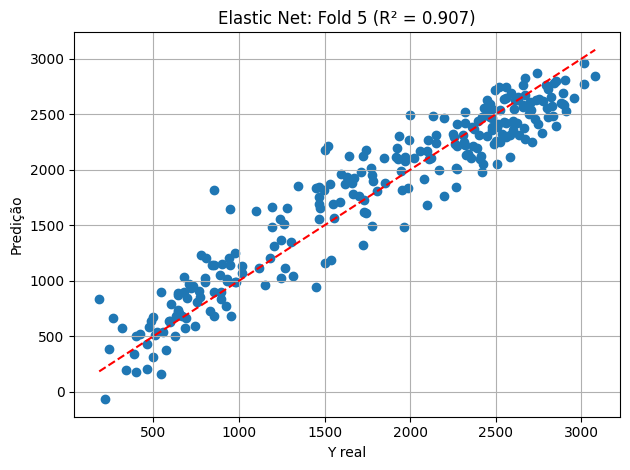


R2 médio no K-Fold: 0.8944622931495594
Desvio padrão do R2: 0.014916361128539952


In [ ]:
# --- ELASTIC NET REGRESSION ---

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'

# separa y e X
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

# K-Fold externo
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):

    # separa treino e teste
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # modelo com pipeline (padronização + ElasticNetCV)
    elastic = make_pipeline(
        StandardScaler(),
        ElasticNetCV(
            l1_ratio=[0.01],   # proporção entre L1 e L2
            alphas=np.logspace(-3, 2, 20), # força da regularização
            cv=5,                           # validação cruzada interna para escolher alpha e l1_ratio
            max_iter=100000,
            random_state=42
        )
    )

    elastic.fit(X_train, y_train)

    # previsão
    y_pred = elastic.predict(X_test)

    # métricas
    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    # parâmetros escolhidos
    modelo_cv = elastic.named_steps['elasticnetcv']
    print(f"Fold {fold}: alpha = {modelo_cv.alpha_:.5f}, l1_ratio = {modelo_cv.l1_ratio_:.2f}, R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot do fold ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Elastic Net: Fold {fold} (R² = {R2:.3f})")

    # linha y = x
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

# Resultados

r2_elastic_net = np.mean(lista_r2)
r2_dp_elastic_net = np.std(lista_r2)
rmse_elastic_net = np.mean(lista_rmse)
rmse_dp_elastic_net = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_elastic_net)
print("Desvio padrão do R2:", r2_dp_elastic_net)


Fold 1: R2 = 0.9394, RMSE = 208.856


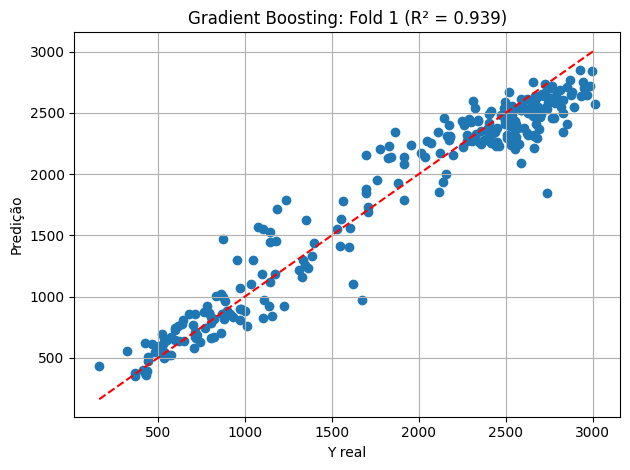

Fold 2: R2 = 0.9372, RMSE = 203.681


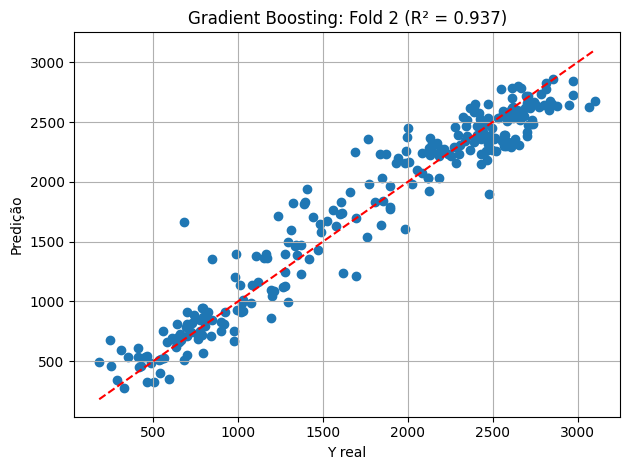

Fold 3: R2 = 0.9425, RMSE = 201.701


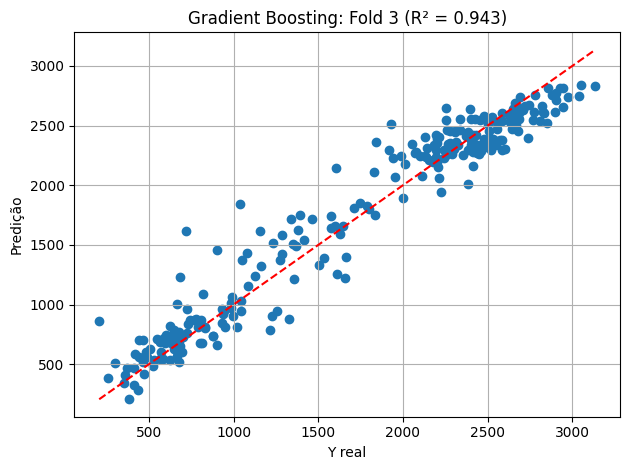

Fold 4: R2 = 0.9082, RMSE = 253.531


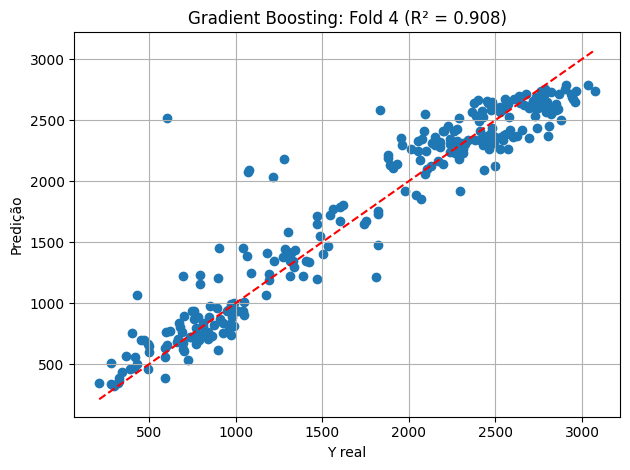

Fold 5: R2 = 0.9371, RMSE = 204.174


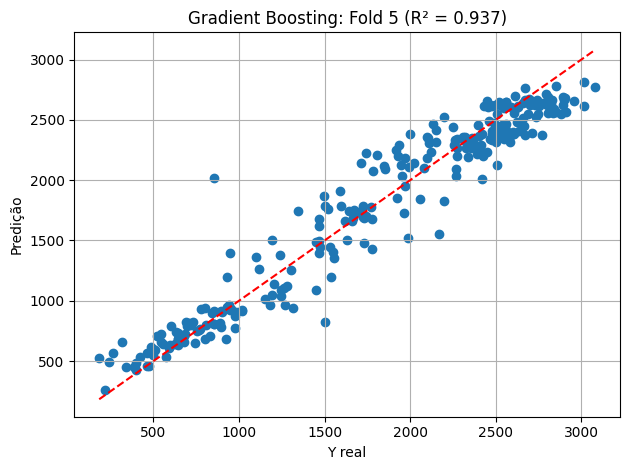


R2 médio no K-Fold: 0.9328858205064371
Desvio padrão do R2: 0.012497834974014596


In [ ]:
# --- GRADIENT BOOSTING REGRESSOR ---

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gb = GradientBoostingRegressor(
        n_estimators=200,      # número de árvores
        learning_rate=0.05,    # taxa de aprendizado
        max_depth=3,           # profundidade das árvores
        subsample=0.8,         # amostragem parcial para evitar overfitting
        random_state=42
    )

    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Gradient Boosting: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_gradient_boosting = np.mean(lista_r2)
r2_dp_gradient_boosting = np.std(lista_r2)
rmse_gradient_boosting = np.mean(lista_rmse)
rmse_dp_gradient_boosting = np.std(lista_rmse)

print("\nR2 médio no K-Fold:", r2_gradient_boosting)
print("Desvio padrão do R2:", r2_dp_gradient_boosting)


Fold 1: R2 = 0.9343, RMSE = 217.378


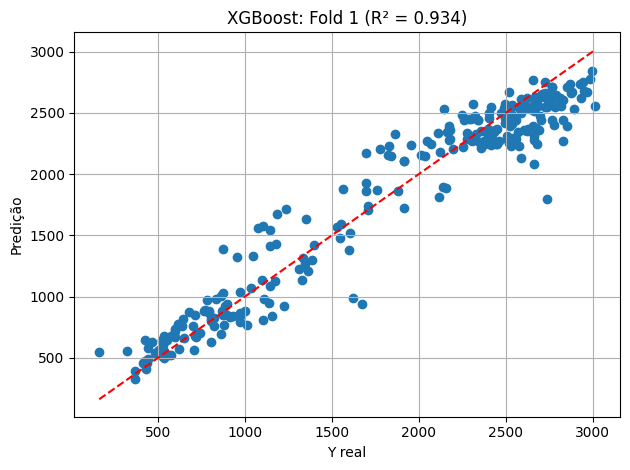

Fold 2: R2 = 0.9389, RMSE = 200.997


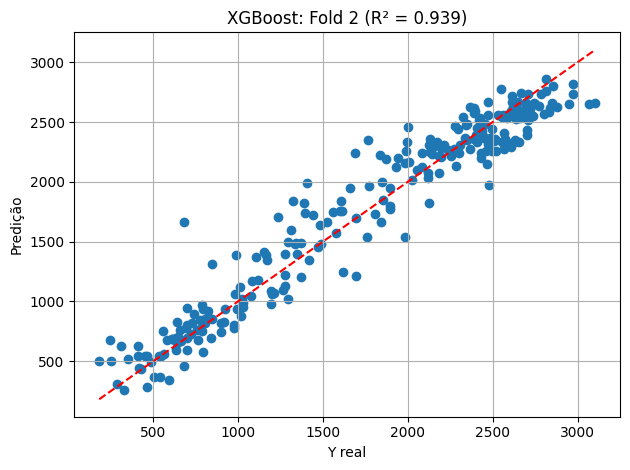

Fold 3: R2 = 0.9415, RMSE = 203.441


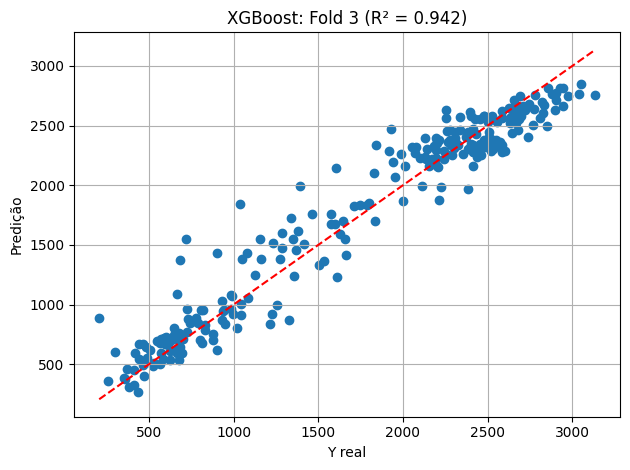

Fold 4: R2 = 0.9065, RMSE = 255.884


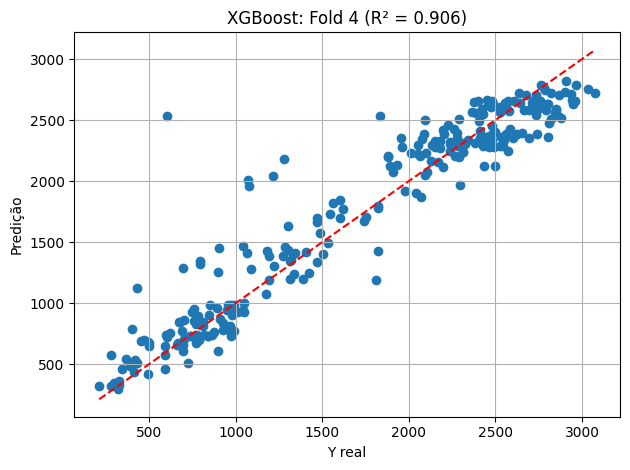

Fold 5: R2 = 0.9353, RMSE = 207.082


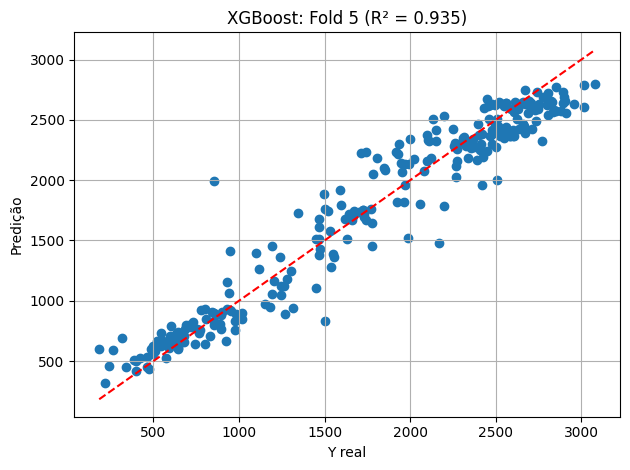


R2 médio no K-Fold: 0.9313023597010449
Desvio padrão do R2: 0.012670134759078815


In [ ]:
# --- XGBOOST REGRESSOR ---

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo XGBoost
    xgb = XGBRegressor(
        n_estimators=200,       # número de árvores
        learning_rate=0.05,     # taxa de aprendizado
        max_depth=3,            # profundidade máxima das árvores
        subsample=0.8,          # fração de amostras usadas em cada árvore
        colsample_bytree=0.8,   # fração de features usadas em cada árvore
        random_state=42,
        objective='reg:squarederror',  # função de perda para regressão
        n_jobs=-1               # usa todos os núcleos disponíveis
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"XGBoost: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_xgboost = np.mean(lista_r2)
r2_dp_xgboost = np.std(lista_r2)
rmse_xgboost = np.mean(lista_rmse)
rmse_dp_xgboost = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_xgboost)
print("Desvio padrão do R2:", r2_dp_xgboost)


Fold 1: R2 = 0.9256, RMSE = 231.423


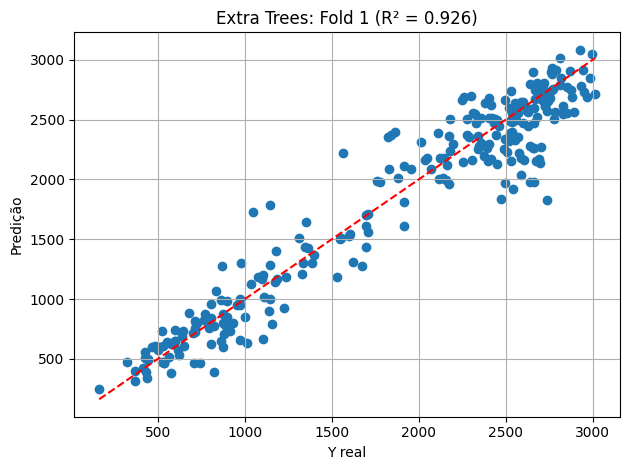

Fold 2: R2 = 0.9216, RMSE = 227.613


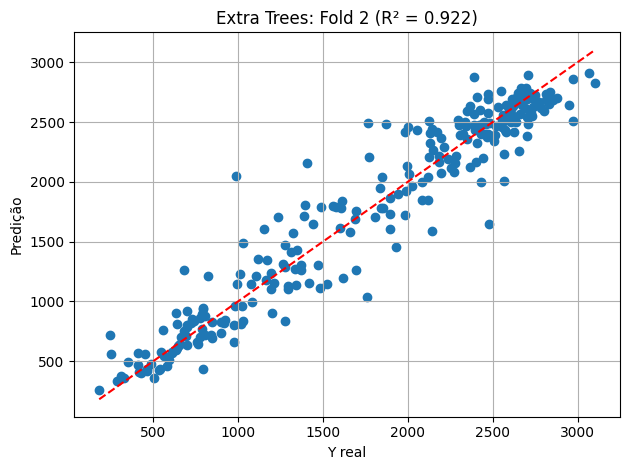

Fold 3: R2 = 0.9236, RMSE = 232.585


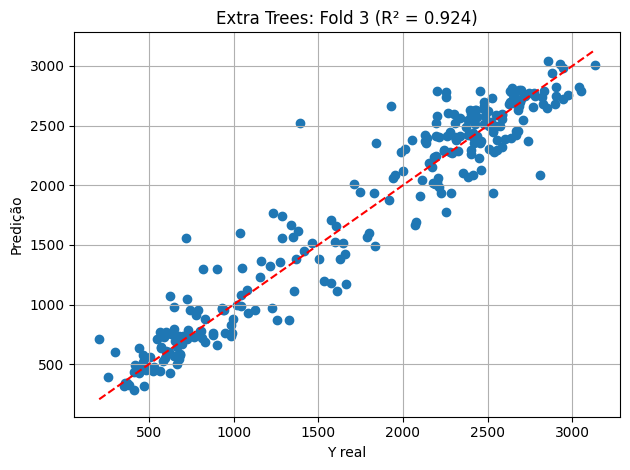

Fold 4: R2 = 0.8750, RMSE = 295.902


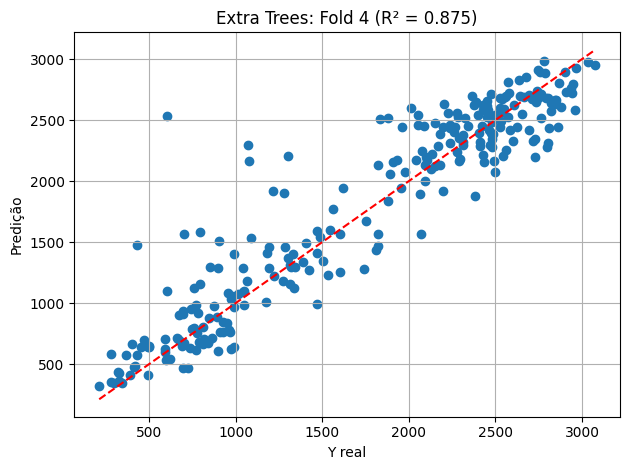

Fold 5: R2 = 0.8991, RMSE = 258.552


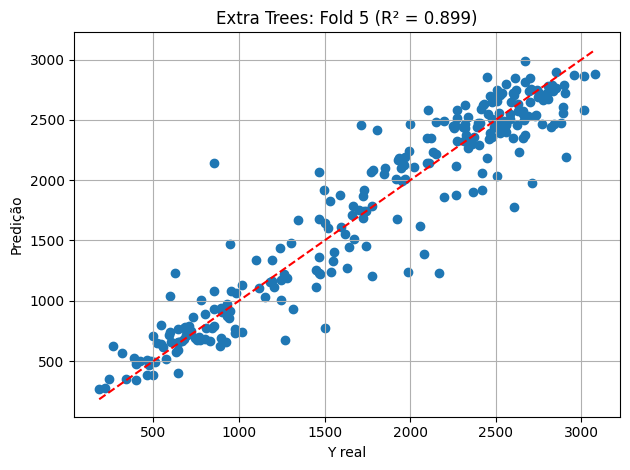


R2 médio no K-Fold: 0.9089663600132294
Desvio padrão do R2: 0.019513887529457492


In [ ]:
# --- EXTRA TREES REGRESSOR ---

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

ylabel = 'Total'
y = data[ylabel].to_numpy()
X = data.drop(columns=[ylabel]).to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lista_r2 = []
lista_rmse = []

fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo Extra Trees
    et = ExtraTreesRegressor(
        n_estimators=200,     # número de árvores
        max_depth=None,       # profundidade máxima
        min_samples_split=2,  # mínimo de amostras para dividir um nó
        min_samples_leaf=1,   # mínimo de amostras por folha
        max_features=None,    # número de features consideradas por split
        bootstrap=False,      # usa toda a amostra em vez de bootstrap
        random_state=42,
        n_jobs=-1             # usa todos os núcleos disponíveis
    )

    et.fit(X_train, y_train)
    y_pred = et.predict(X_test)

    R2 = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

    lista_r2.append(R2)
    lista_rmse.append(RMSE)

    print(f"Fold {fold}: R2 = {R2:.4f}, RMSE = {RMSE:.3f}")

    # --- Plot ---
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Y real")
    plt.ylabel("Predição")
    plt.title(f"Extra Trees: Fold {fold} (R² = {R2:.3f})")
    xl = np.linspace(min(y_test), max(y_test), 50)
    plt.plot(xl, xl, 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    fold += 1

r2_extra_trees = np.mean(lista_r2)
r2_dp_extra_trees = np.std(lista_r2)
rmse_extra_trees = np.mean(lista_rmse)
rmse_dp_extra_trees = np.std(lista_rmse)
print("\nR2 médio no K-Fold:", r2_extra_trees)
print("Desvio padrão do R2:", r2_dp_extra_trees)


In [ ]:
#COMPARAR ALGORITMOS

import pandas as pd

resultados = {
    'Modelo': [
        'Regressão Linear', 'Lasso', 'Decision Tree', 'Random Forest',
        'Ridge', 'Elastic Net', 'Gradient Boosting', 'XGBoost', 'Extra Trees'
    ],
    'R² médio': [
        r2_reg_lin_mult, r2_lasso, r2_decision_tree, r2_random_forest,
        r2_ridge, r2_elastic_net, r2_gradient_boosting, r2_xgboost, r2_extra_trees
    ],
    'R² DP': [
        r2_dp_reg_lin_mult, r2_dp_lasso, r2_dp_decision_tree, r2_dp_random_forest,
        r2_dp_ridge, r2_dp_elastic_net, r2_dp_gradient_boosting, r2_dp_xgboost, r2_dp_extra_trees
    ],
    'RMSE médio': [
        rmse_reg_lin_mult, rmse_lasso, rmse_decision_tree, rmse_random_forest,
        rmse_ridge, rmse_elastic_net, rmse_gradient_boosting, rmse_xgboost, rmse_extra_trees
    ],
    'RMSE DP': [
        rmse_dp_reg_lin_mult, rmse_dp_lasso, rmse_dp_decision_tree, rmse_dp_random_forest,
        rmse_dp_ridge, rmse_dp_elastic_net, rmse_dp_gradient_boosting, rmse_dp_xgboost, rmse_dp_extra_trees
    ]
}

tabela = pd.DataFrame(resultados)
print(tabela.round(5))


              Modelo  R² médio    R² DP  RMSE médio   RMSE DP
0   Regressão Linear   0.89156  0.01626   272.84212  20.73458
1              Lasso   0.90242  0.01701   258.65241  22.68239
2      Decision Tree   0.90131  0.01460   260.31022  20.44851
3      Random Forest   0.92726  0.01707   222.68835  26.58900
4              Ridge   0.89443  0.01505   269.28055  19.74028
5        Elastic Net   0.89446  0.01492   269.26412  19.70927
6  Gradient Boosting   0.93289  0.01250   214.38856  19.71151
7            XGBoost   0.93130  0.01267   216.95642  20.25058
8        Extra Trees   0.90897  0.01951   249.21486  25.79374


In [ ]:
#---OBSERVAÇÕES ESPECÍFICAS---

nova_obs = pd.DataFrame({
    'Precipitacao_mm':[0],
    'Temp_max_C':[25],
    'Temp_min_C':[20],
    'Umid_rel_ar':[50],
    'Vento_velocidade_horaria (m/s)': [3],
    'Vento_rajada_maxima (m/s)': [3],
    'Dia_mês': ['25'],
    'Dia_semana': ['ter'],
    'Mês': ['5'],
    'prato_principal_1':['lasanha à bolonhesa'],
    'prato_principal_2': ['curry de legumes'],
    'guarnição': ['legumes sautê'],
    'sobremesa_1': ['goiabada'],
    'refeicao': ['almoco']
})

nova_obs = pd.get_dummies(nova_obs)
# Reindexa para garantir mesmo formato do treino
nova_obs = nova_obs.reindex(columns=atributos, fill_value=0)

print("Predição lasso:", lasso.predict(nova_obs))
print("Predição xgboost:", xgb.predict(nova_obs))
print("Predição gradient boosting:", gb.predict(nova_obs))
print("Predição elastic net:", elastic.predict(nova_obs))
print('\n')

Predição lasso: [1984.20692622]
Predição xgboost: [1721.232]
Predição gradient boosting: [1712.95238698]
Predição elastic net: [2234.81040944]




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#Importância

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

coef = lasso.coef_
features = X_original.columns

df_coef = pd.DataFrame({
    'feature': features,
    'coef': coef
}).sort_values('coef')

df_alimentos = df_coef[df_coef['feature'].str.contains(
    'prato|guarn|salada|sobremesa', regex=True
)]

df_alimentos

,feature,coef
70,prato_principal_1_Filé de peixe,-260.081908
84,prato_principal_1_Peixe frito,-145.320042
131,prato_principal_2_PVT,-38.601516
129,prato_principal_2_Ovo cozido,-34.549305
58,prato_principal_1_Bife,-34.425824
158,guarnição_Farofa,-30.969681
77,prato_principal_1_Isca de carne,-29.364871
82,prato_principal_1_Lombo,-8.314288
157,guarnição_Ervilha parmentier,-2.805502
60,prato_principal_1_Carne de panela,0.000000


In [ ]:
#Modelo Elastic Net

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

elastic = make_pipeline(
        StandardScaler(),
        ElasticNetCV(
            l1_ratio=[0.01],   # proporção entre L1 e L2
            alphas=np.logspace(-3, 2, 20), # força da regularização
            cv=5,                           # validação cruzada interna para escolher alpha e l1_ratio
            max_iter=100000,
            random_state=42
        )
    )

elastic.fit(X, y)

#Coeficientes

coef = elastic.named_steps["elasticnetcv"].coef_
features = X_original.columns
df_coef = pd.DataFrame({
    "feature": features,
    "coef": coef
}).sort_values("coef")

#Filtrar apenas as variáveis de alimentos
df_alimentos = df_coef[
    df_coef["feature"].str.contains("prato|guarn|salada|sobremesa", regex=True)
]

#df_alimentos
df_coef

,feature,coef
7,eh_vespera_nao_letivo,-249.698938
25,Dia_semana_sáb,-215.934189
9,Mês_1,-108.043320
20,Mês_12,-103.636678
240,refeicao_jantar,-79.728467
24,Dia_semana_sex,-73.760110
8,eh_depois_nao_letivo,-66.260847
15,Mês_7,-55.782890
70,prato_principal_1_Filé de peixe,-51.803352
84,prato_principal_1_Peixe frito,-34.347017
